# LendingClub Loan Data - Exploratory Data Analysis

This is an EDA project for the loan data as provided by LendingClub from 2007 to 2018. I will inspect the data dimenstions, identify important missing values, point out the need for data validation, and finally investigate the total loan amount, as well as the fraction of good loans, as a function of calendar years.

1. Data dimension and datatypes
2. Important missing values
3. Data validation
4. EDA

## 1. Data Dimension and Datatypes

Import needed Python libraries and read CSV data from the `./data` directory. I first try to understand how many rows and columns are in this table.

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/loan.csv')
df.shape

(2260668, 145)

We can see that this is a table contaiing more than 2 million rows, each with 145 columns. Inspect datatypes for each column:

In [190]:
df.dtypes.value_counts()

float64    105
object      36
int64        4
dtype: int64

Most of the columns consist of float64 datatypes. The rest are strings (objects) and int64.

Next, we inspect the first 10 rows to get a sense of what the data actually look like.

In [193]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Important Missing Values

Apparently there are many columns with missing (NaN) values. Let's try to quantify the number of missing data in each column, and identify critical fields where missing data may hinder further analysis by data scientists.

In [197]:
missingDataDf = df.isnull().sum().reset_index()
missingDataDf.columns=['column_name','num_null']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(missingDataDf[missingDataDf['num_null']>0])

                                    column_name  num_null
0                                            id   2260668
1                                     member_id   2260668
10                                    emp_title    166969
11                                   emp_length    146907
13                                   annual_inc         4
18                                          url   2260668
19                                         desc   2134601
21                                        title     23325
22                                     zip_code         1
24                                          dti      1711
25                                  delinq_2yrs        29
26                             earliest_cr_line        29
27                               inq_last_6mths        30
28                       mths_since_last_delinq   1158502
29                       mths_since_last_record   1901512
30                                     open_acc        29
31            

One can notice that the loan `id` and  `member_id` are completely missing. This is not ideal since there is no simple way to identify individual loan or borrower in the absence of these keys, and also the construction of normalized tables will become difficult. I will attempt to assign unique loan `id` to each loan listing. In principle we may use the information contained within the table to identify individual borrowers and assign `member_id` accordingly. For simplicity, however, I will assume that each listing represents a unique borrower, and so I will assign unique `member_id` to each listing. Indexing as such will also be done for the data pipeline.

In [244]:
df['id'] = df['id'].fillna(df.index.to_series()).astype(int)
df['member_id'] = df['member_id'].fillna(df.index.to_series()).astype(int)
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,datetime,year,isBadLoan
0,0,0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
1,1,1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
2,2,2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
3,3,3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
4,4,4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
5,5,5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
6,6,6,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
7,7,7,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
8,8,8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False
9,9,9,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,N,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-01,2018,False


## 3. Data Validation

The data contains several columns of date information as strings. I will transform them to the datetime format. 
In addition, I will carry out validation to make sure the funded loan amount is never larger than the requested amount. These validations will also be done for the data pipeline.

In [221]:
dateColumn = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'sec_app_earliest_cr_line']
df[dateColumn].tail(10)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,sec_app_earliest_cr_line
2260658,Oct-2017,Mar-2001,Mar-2018,NaN,Feb-2019,NaN
2260659,Oct-2017,Jul-1988,Feb-2019,Mar-2019,Feb-2019,NaN
2260660,Oct-2017,Feb-2004,Feb-2019,Mar-2019,Feb-2019,NaN
2260661,Oct-2017,Nov-2004,Feb-2019,Mar-2019,Feb-2019,NaN
2260662,Oct-2017,Aug-1996,Feb-2019,Mar-2019,Feb-2019,NaN
2260663,Oct-2017,Jan-2004,Feb-2019,Mar-2019,Feb-2019,NaN
2260664,Oct-2017,Mar-2003,Aug-2018,NaN,Sep-2017,Apr-2003
2260665,Oct-2017,Feb-1995,Feb-2019,Mar-2019,Feb-2019,NaN
2260666,Oct-2017,Jul-2003,Feb-2019,Mar-2019,Feb-2019,NaN
2260667,Oct-2017,Apr-2014,Feb-2019,Mar-2019,Feb-2019,NaN


Transform to datetime64

In [226]:
for col in dateColumn:
    df[col] = pd.to_datetime(df[col], format='%b-%Y')
df[dateColumn].tail(10)

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,sec_app_earliest_cr_line
2260658,2017-10-01,2001-03-01,2018-03-01,NaT,2019-02-01,NaT
2260659,2017-10-01,1988-07-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260660,2017-10-01,2004-02-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260661,2017-10-01,2004-11-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260662,2017-10-01,1996-08-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260663,2017-10-01,2004-01-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260664,2017-10-01,2003-03-01,2018-08-01,NaT,2017-09-01,2003-04-01
2260665,2017-10-01,1995-02-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260666,2017-10-01,2003-07-01,2019-02-01,2019-03-01,2019-02-01,NaT
2260667,2017-10-01,2014-04-01,2019-02-01,2019-03-01,2019-02-01,NaT


In [227]:
df[dateColumn].tail(10).dtypes

issue_d                     datetime64[ns]
earliest_cr_line            datetime64[ns]
last_pymnt_d                datetime64[ns]
next_pymnt_d                datetime64[ns]
last_credit_pull_d          datetime64[ns]
sec_app_earliest_cr_line    datetime64[ns]
dtype: object

Here I create a new column of the loan issuance year for EDA in the next section.

In [228]:
df['year'] = df['issue_d'].apply(lambda x: x.year)

Now I check whether the funded loan amount is ever greater than the requested amount.

In [229]:
df.query('funded_amnt > loan_amnt')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,datetime,year,isBadLoan


In [230]:
df.query('funded_amnt_inv > loan_amnt')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,datetime,year,isBadLoan


No row where the funded amount is greater than the requested amount. This is the ideal case.

## 4. EDA

In this section, as a first step towards analyzing the dataset, I examine the distribution and sum of the dollar amount of loans each year. This helps the analysts acquire a sense of the magnitude and the time span of the problem. The plots show a coherent story - the amount of loans consistently increased since 2007 to 2014, after which the loan amount plateaued. In 2018, a slight growth can be observed.

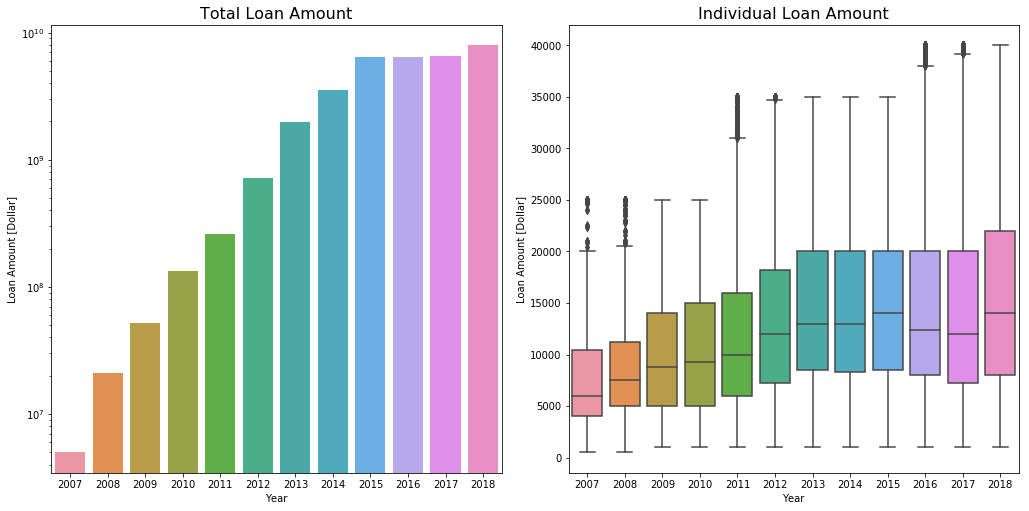

In [241]:
fig, ax = plt.subplots(1,2,figsize=(14.4, 7.2))
loan_amnt_sum = df.groupby('year')['loan_amnt'].sum().reset_index()
sns.barplot('year', 'loan_amnt', data=loan_amnt_sum, ax=ax[0])
ax[0].set_yscale('log')
sns.boxplot('year', 'loan_amnt', data=df, ax=ax[1])
ax[0].set_title('Total Loan Amount', fontsize=16)
ax[1].set_title('Individual Loan Amount', fontsize=16)
ax[0].set_ylabel('Loan Amount [Dollar]')
ax[0].set_xlabel('Year')
ax[1].set_ylabel('Loan Amount [Dollar]')
ax[1].set_xlabel('Year')

Depending on how borrowers make payments, a loan can be in a 'good' or 'bad' status. It is critical for lenders to understand how often a loan can become bad. In this section, I calculate the ratio of good vs bad loans, and showcase the ratio of good loans in the time span of the data.

First let's look at the possible loan statuses and their freqency:

In [212]:
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

Let's categorize the following loan statuses as 'bad': 

- Charged Off 
- Late (31-120 days) 
- In Grace Period 
- Late (16-30 days) 
- Does not meet the credit policy. Status:Charged Off 
- Default

In [233]:
badLoanList = ['Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off', 'Default']
def isBadLoan(x, badLoanList):
    return (x in badLoanList)

df['isBadLoan'] = df['loan_status'].apply(lambda x: isBadLoan(x, badLoanList))

In [234]:
good_loans = df[df.isBadLoan==False].groupby(['year'])['loan_amnt'].sum().reset_index()
total_loans = df.groupby(['year'])['loan_amnt'].sum().reset_index()

Here I compute the amount of bad loans from the total amount of loans and the amount of good loans. Also I compute the fraction of good loans for each calendar year.

In [239]:
merged_loans = pd.merge(good_loans, total_loans, on='year', suffixes=['_good', '_total'])
merged_loans['loan_amnt_bad'] = merged_loans['loan_amnt_total'] - merged_loans['loan_amnt_good']
merged_loans['good_fraction'] = merged_loans['loan_amnt_good'] / merged_loans['loan_amnt_total']
merged_loans

,year,loan_amnt_good,loan_amnt_total,loan_amnt_bad,good_fraction
0,2007,3425250,4977475,1552225,0.688150
1,2008,16134800,21119250,4984450,0.763985
2,2009,44300175,51928250,7628075,0.853104
3,2010,113391400,131992550,18601150,0.859074
4,2011,218323225,261683825,43360600,0.834302
5,2012,591168100,718411025,127242925,0.822883
6,2013,1652757675,1982765275,330007600,0.833562
7,2014,2851850475,3503840175,651989700,0.813921
8,2015,5185799425,6417608175,1231808750,0.808058
9,2016,5247650000,6400569700,1152919700,0.819872


In [237]:
loan_amnt_condition = {'amnt': [merged_loans['loan_amnt_good'].sum(), merged_loans['loan_amnt_bad'].sum()]}
loanAmntConditionDf = pd.DataFrame(loan_amnt_condition, index=['Good','Bad'])

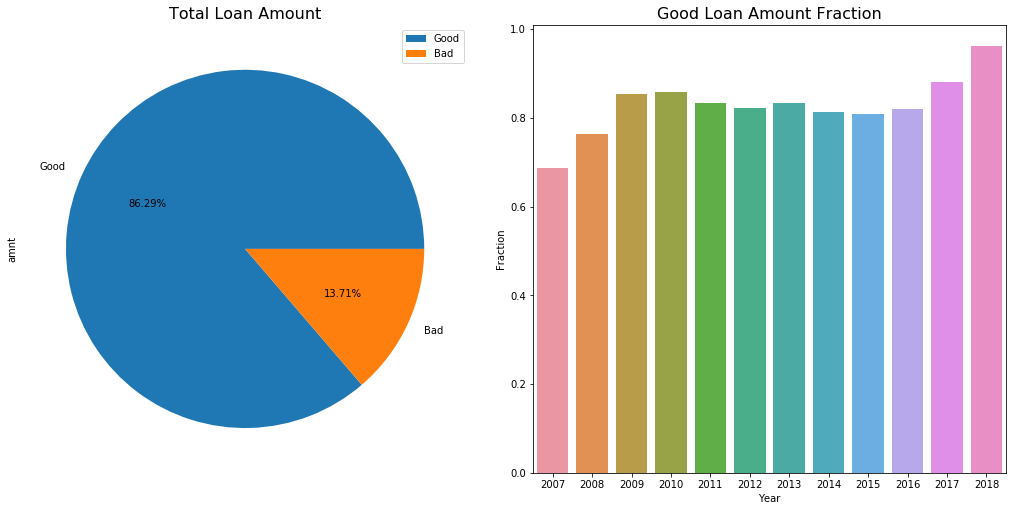

In [242]:
f, ax = plt.subplots(1,2, figsize=(14.4,7.2))
loanAmntConditionDf.plot.pie(autopct='%1.2f%%', ax=ax[0], y='amnt')
sns.barplot('year', 'good_fraction', data=merged_loans, ax=ax[1])
ax[0].set_title('Total Loan Amount', fontsize=16)
ax[1].set_title('Good Loan Amount Fraction', fontsize=16)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Fraction')

Overall we can observe that the amount of bad loans is less than 15% of the total amount. The fraction of good loans stays above 80% of the annual total since 2009. Since 2016, a steady growth of the good loans can be seen, reaching a percentage of ~96% in 2019.